In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import px4tools.ulog
import pandas
import os
import pickle
import scipy.interpolate
import px4tools.version

In [3]:
pandas.__version__

'0.19.99'

In [4]:
px4tools.version.git_revision

'ef4d00d967e186c6246698a7646c52fdee9ec831'

In [5]:
d_gyro = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_gyro',
    processing_func=lambda x: x['sensor_gyro_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_gyro_0.pkl',
    force_processing=False)

{'sensor_gyro_0_randomwalk_correlation_time': [1415.9827787884374,
  2048.5579074271768,
  10270.03633446817],
 'sensor_gyro_0_sig_bi': [4.9379700810442836e-05,
  2.7434871176294852e-05,
  2.6180681020682223e-05],
 'sensor_gyro_0_sig_rrw': [1.1976372920603521e-05,
  2.6726491322334156e-06,
  2.1259770744470798e-06],
 'sensor_gyro_0_sig_rw': [9.7759518754781546e-05,
  7.2235022978164661e-05,
  6.4048991637151659e-05],
 'sensor_gyro_0_tau_0': [1.5054819755701425,
  1.3261040513330657,
  1.6327089904931642],
 'sensor_gyro_0_tau_1': [14.97601197193079,
  80.492032366949829,
  60.866429186869361],
 'sensor_gyro_0_tau_2': [35.360458032528349,
  243.33465561148876,
  1012.8207323224176]}

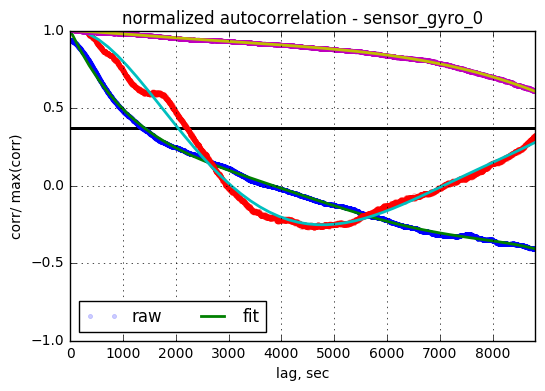

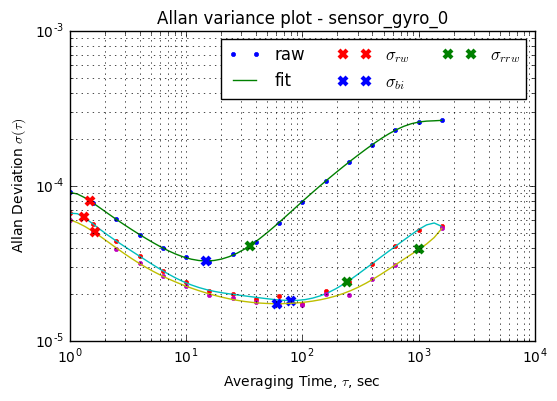

In [6]:
px4tools.ulog.noise_analysis_sensor(
    d_gyro[:'4.99 h'],
    'sensor_gyro_0',
    allan_args={'poly_order':10})

In [7]:
d_accel = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_accel',
    processing_func=lambda x: x['sensor_accel_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_accel_0.pkl',
    force_processing=False)

failed to find tau_2
failed to find tau_1


{'sensor_accel_0_randomwalk_correlation_time': [9339.1647303431455,
  8941.8123922144041,
  10675.599925275754],
 'sensor_accel_0_sig_bi': [0.00034887071449498985, nan, 0.0008862553096020035],
 'sensor_accel_0_sig_rrw': [nan, 0.0024426933841622191, 0.0001496116155969152],
 'sensor_accel_0_sig_rw': [0.0013189375305705767,
  0.032428590976640831,
  0.0020874330172677828],
 'sensor_accel_0_tau_0': [1.8954347006248873,
  5927.9384183083639,
  1.3125055514902062],
 'sensor_accel_0_tau_1': [176.73813791855878, nan, 23.403165005175119],
 'sensor_accel_0_tau_2': [nan, 1, 99.95313682353013]}

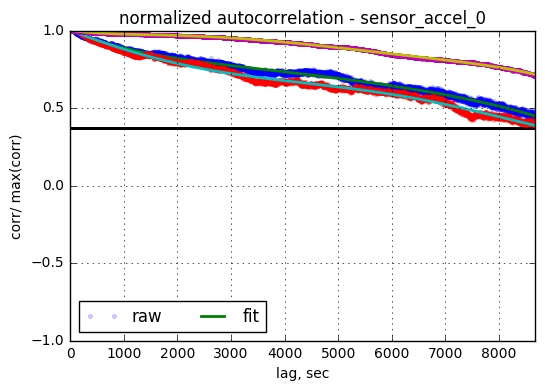

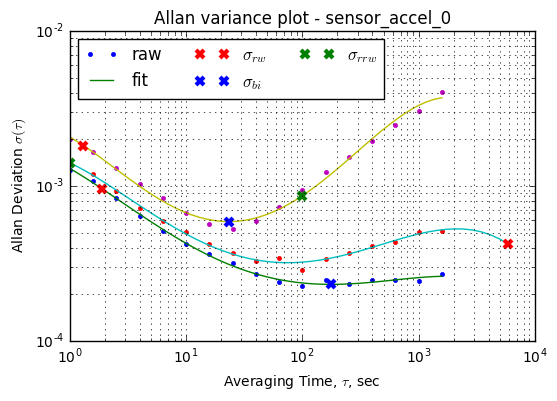

In [8]:
px4tools.ulog.noise_analysis_sensor(
    d_accel[:'4.9 h'],
    'sensor_accel_0',
    allan_args={'poly_order':4})

In [9]:
d_baro = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_baro',
    processing_func=lambda x: x['sensor_baro_0'].resample('100 ms').agg('mean'),
    save_path='./logs/19_19_32-sensor_baro_0.pkl',
    force_processing=False)

{'sig_bi': 0.077206699887699237,
 'sig_rrw': 0.037970096441590419,
 'sig_rw': 0.056878740634089042,
 'tau_0': 1,
 'tau_1': 2.3221638893189538,
 'tau_2': 12.90072052524933}

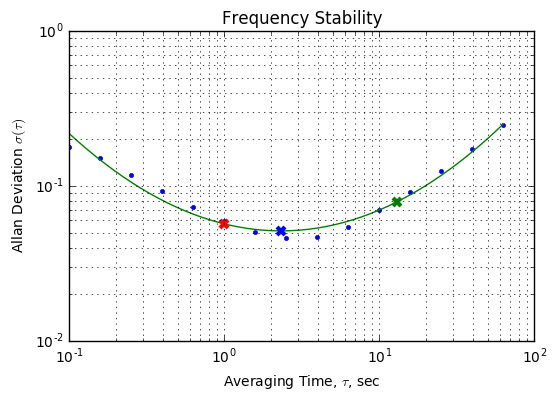

In [10]:
px4tools.ulog.plot_allan_std_dev(d_baro.t_sensor_baro_0__f_altitude,
                                poly_order=2, min_intervals=200)

13284.697587982973

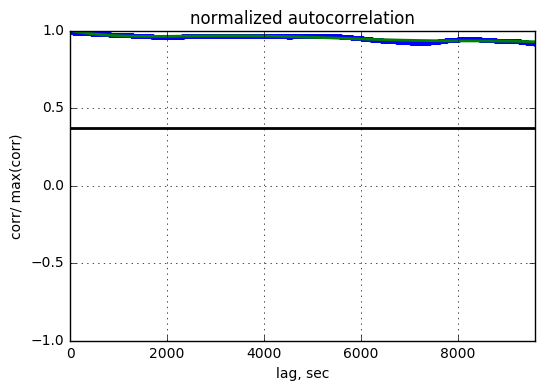

In [11]:
px4tools.ulog.plot_autocorrelation(d_baro.t_sensor_baro_0__f_altitude)

In [12]:
d_mag = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_mag',
    processing_func=lambda x: x['sensor_mag_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_mag_0.pkl',
    force_processing=False)

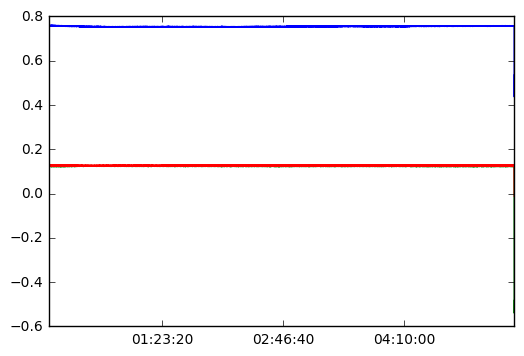

In [23]:
d_mag.t_sensor_mag_0__f_x.plot()
d_mag.t_sensor_mag_0__f_y.plot()
d_mag.t_sensor_mag_0__f_z.plot()

In [24]:
np.sqrt(d_mag.t_sensor_mag_0__f_x**2 + d_mag.t_sensor_mag_0__f_y**2 + d_mag.t_sensor_mag_0__f_z**2).mean()

0.7753296013655869

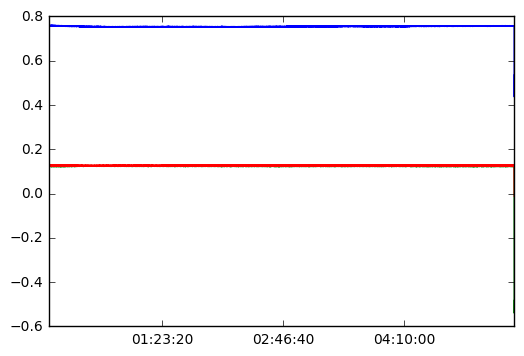

In [29]:
d_mag.t_sensor_mag_0__f_x.plot()
d_mag.t_sensor_mag_0__f_y.plot()
d_mag.t_sensor_mag_0__f_z.plot()

{'sig_bi': 0.00024672417935095567,
 'sig_rrw': 2.5570046490223252e-05,
 'sig_rw': 0.0005963317088016392,
 'tau_0': 4.33886939989989,
 'tau_1': 40.394014074386973,
 'tau_2': 376.0602642428974}

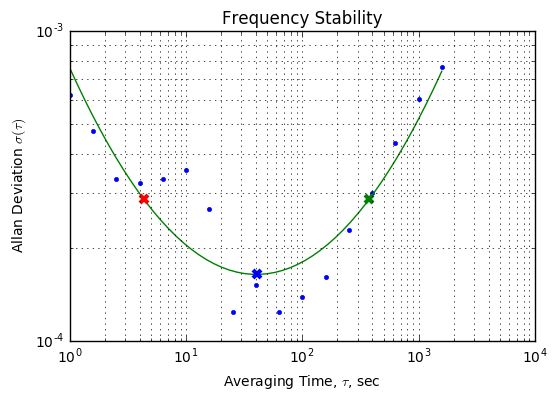

In [13]:
px4tools.ulog.plot_allan_std_dev(d_mag.t_sensor_mag_0__f_x[:'4.99 h'],
                                poly_order=2)

7936.0204451989866

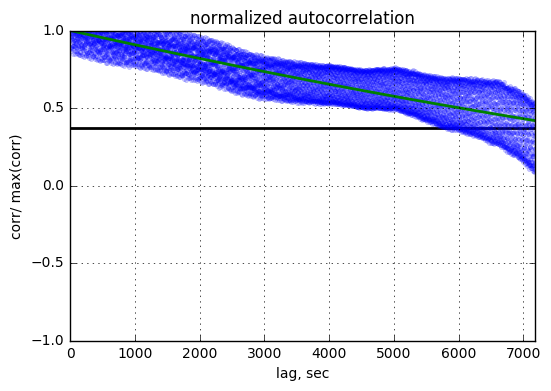

In [14]:
px4tools.ulog.plot_autocorrelation(d_mag.t_sensor_mag_0__f_x['1 h':'4.99 h'],
                                poly_order=2)

In [30]:
d_mag2 = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/01-03-17-mhkabir-pixhawk2.ulg',
    msg_filter='sensor_mag',
    processing_func=lambda x: x['sensor_mag_0'].resample('1 s').agg('mean'),
    save_path='./logs/01-03-17-mhkabir-pixhawk-mag-0.pkl',
    force_processing=False)

{'sig_bi': 0.0011743062910828175,
 'sig_rrw': 5.4582442677060197e-05,
 'sig_rw': 0.0016693905472005412,
 'tau_0': 1,
 'tau_1': 49.816173049024222,
 'tau_2': 7536.9736482712515}

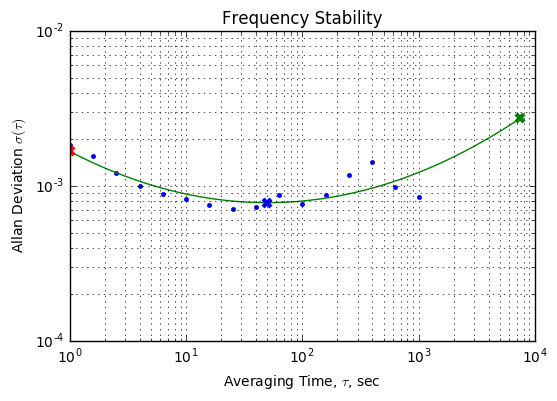

In [31]:
px4tools.ulog.plot_allan_std_dev(d_mag2.t_sensor_mag_0__f_x[:'4.99 h'],
                                poly_order=2)

1105.883167152549

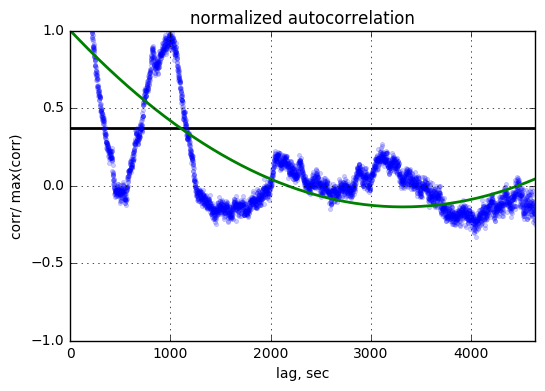

In [33]:
px4tools.ulog.plot_autocorrelation(
    d_mag2.t_sensor_mag_0__f_x['1 h':'4.99 h'], poly_order=2)